In [1]:
import sys
import os
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import pyplot as plt
from matplotlib import gridspec
import seaborn as sns
import gseapy as gp
import decoupler as dc
import scanpy as sc

# Append the src directory to the path
current_dir = os.getcwd()
src_dir = os.path.abspath(os.path.join(current_dir, '..', 'src'))
if src_dir not in sys.path:
    sys.path.append(src_dir)

working_dir = "/ocean/projects/cis240075p/asachan/datasets/TA_muscle/seurat_outs/tables"

/ocean/projects/cis240075p/asachan/.conda/envs/scproc/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from deg import *

In [3]:
adata_file = '/ocean/projects/cis240075p/asachan/datasets/TA_muscle/ERCC1_KO_mice/integrated_samples/scANVI_v1.h5ad'
adata = sc.read_h5ad(adata_file)

/ocean/projects/cis240075p/asachan/.conda/envs/scproc/lib/python3.12/site-packages/anndata/_core/anndata.py:1774: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


In [4]:
adata

AnnData object with n_obs × n_vars = 87916 × 2000
    obs: 'sample_id', 'cell_type', 'condition', 'background_fraction', 'cell_probability', 'cell_size', 'droplet_efficiency', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'total_counts_mt_cb', 'log1p_total_counts_mt_cb', 'pct_counts_mt_cb', 'total_counts_ribo_cb', 'log1p_total_counts_ribo_cb', 'pct_counts_ribo_cb', 'total_counts_hb_cb', 'log1p_total_counts_hb_cb', 'pct_counts_hb_cb', 'n_genes', 'sex', 'batch', '_scvi_batch', '_scvi_labels', 'C_scANVI'
    var: 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'highly_variable_nbatches'
    uns: 'C_scANVI_colors', '_scvi_manager_uuid', '_scvi_uuid', 'batch_colors', 'cell_type_colors', 'condition_colo

In [ ]:
# create a new obs for sex (take the first letter of the orig.ident)
#adata.obs['sex'] = adata.obs['orig.ident'].str[0]

In [ ]:
# cell_type_colors = {
#     'Fast IIB': '#FF9999',      # Light red/salmon
#     'Fast IIX': '#99C2FF',      # Light blue
#     'FAPs': '#99FFAB',          # Light green
#     'EC': '#E5B3FF',            # Light purple
#     'MTJ': '#FFB366',           # Light orange
#     'Pericyte': '#FFE4B5',      # Gold
#     'Skeleton MuSc': '#D4B499',  # Light brown
#     'NMJ': '#FFB3D9',           # Light pink
#     'Tendon': '#B3E6E6',        # Light cyan
#     'Macrophages': '#CCCCCC'    # Light gray
# }
# condition_colors = {
#     'WT': '#FFDAB9', # peachpuff
#     'KO': '#008080'     # Teal (darker)
# }
# sex_colors = {
#     'F': '#FFE4B5',   
#     'M': '#B8860B'    
# }

In [ ]:
# # Add the colors to adata
# adata.uns['cell_type_colors'] = [cell_type_colors[cell_type] for cell_type in adata.obs['cell_type'].cat.categories]
# adata.uns['condition_colors'] = [condition_colors[cond] for cond in adata.obs['condition'].cat.categories]
# adata.uns['sex_colors'] = [sex_colors[sex] for sex in adata.obs['sex'].cat.categories]

<Axes: title={'center': 'C_scANVI'}, xlabel='UMAP1', ylabel='UMAP2'>

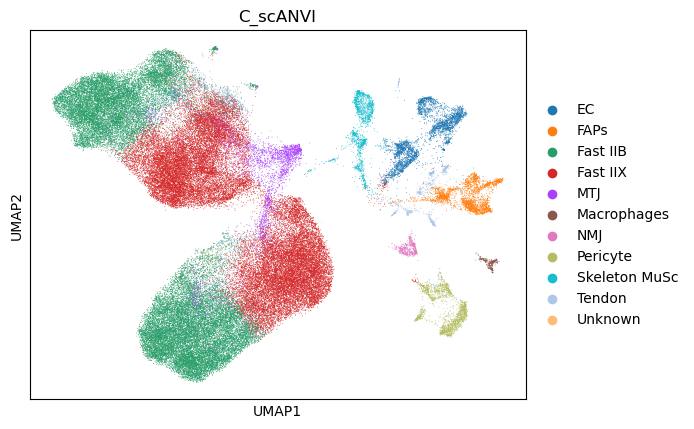

In [5]:
sc.pl.umap(adata, color=['C_scANVI'], show=False)

In [11]:
# get counts of obs C_scANVI
print(adata.obs['C_scANVI'].value_counts())


C_scANVI
Fast IIX         35382
Fast IIB         34582
EC                3790
MTJ               3420
FAPs              2837
Pericyte          2375
Skeleton MuSc     2204
Tendon            1856
NMJ                895
Macrophages        575
Unknown              0
Name: count, dtype: int64


<Axes: title={'center': 'Δ ERCC1 KO cells'}, xlabel='UMAP1', ylabel='UMAP2'>

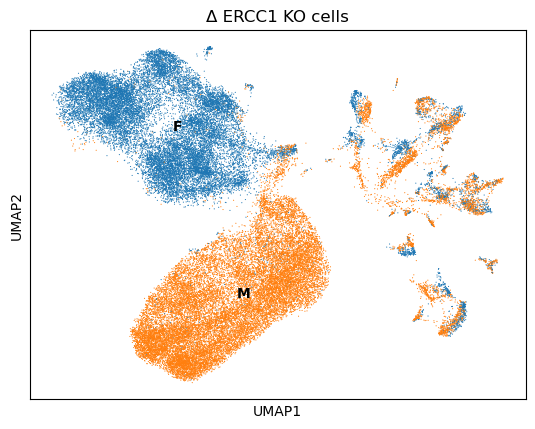

In [6]:
sc.pl.umap(adata[adata.obs['condition'] == 'KO'], color=['sex'], legend_loc='on data', show=False, title='Δ ERCC1 KO cells')

<Axes: title={'center': 'WT cells'}, xlabel='UMAP1', ylabel='UMAP2'>

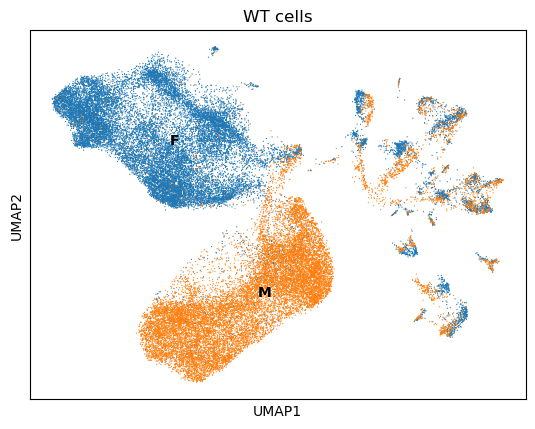

In [7]:
sc.pl.umap(adata[adata.obs['condition'] == 'WT'], color=['sex'], legend_loc='on data', show=False, title='WT cells')

# Cell population depletion/expansion analysis

#### Cells pooled from both sexes

In [9]:
results_df = get_cell_type_percentages(adata, cell_type_label='C_scANVI')
results_df_by_sex = get_cell_type_percentages_by_sex(adata, cell_type_label='C_scANVI')


NameError: name 'C_scANVI_colors' is not defined

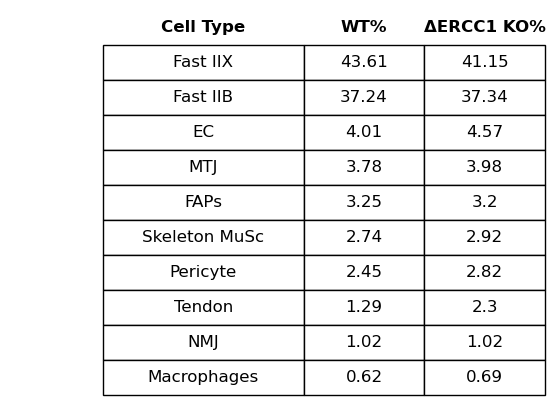

In [10]:
# Create figure and axis
fig, ax = plt.subplots(figsize=(6, 5))
ax.axis('off')

# Create table with more space on the left
table = ax.table(cellText=results_df.values,
                colLabels=results_df.columns,
                cellLoc='center',
                loc='center',
                bbox=[0.2, 0, 0.95, 1])

# Style the table
table.auto_set_font_size(False)
table.set_fontsize(12)
# Make headers bold and remove their edges
for col in range(len(results_df.columns)):
    header_cell = table[(0, col)]
    header_cell.set_text_props(weight='bold')
    header_cell.set_edgecolor('none')  # Remove cell borders for headers
    header_cell.set_facecolor('none')  # Remove cell background for headers
# Reduce row height and column width
for cell in table._cells:
    table._cells[cell].set_height(0.05)
    if cell[1] in [1, 2]:
        table._cells[cell].set_width(0.15)
    else:
        table._cells[cell].set_width(0.25)

# Add colored dots with correct y-positions
num_rows = len(results_df)
for idx in range(num_rows):
    cell_type = results_df['Cell Type'].iloc[idx]
    
    # Calculate y position from top to bottom
    y_pos = 1 - ((idx + 1.5) / (num_rows + 1))
    
    ax.scatter(0.23,
              y_pos,
              c=[C_scANVI_colors.get(cell_type, 'black')],
              s=100,
              clip_on=False,
              zorder=1000)

# Set the plot limits explicitly to show the dots
ax.set_xlim(0.1, 1)
ax.set_ylim(0, 1)
plt.tight_layout()
plt.show()

In [ ]:
# # Create figure and axis
# fig, ax = plt.subplots(figsize=(10, 5))  # Made wider to accommodate more columns
# ax.axis('off')
# # Create table with more space on the left
# table = ax.table(cellText=results_df_by_sex.values,
#                 colLabels=results_df_by_sex.columns,
#                 cellLoc='center',
#                 loc='center',
#                 bbox=[0.2, 0, 0.95, 1])

# # Style the table
# table.auto_set_font_size(False)
# table.set_fontsize(12)

# # Make headers bold
# for col in range(len(results_df_by_sex.columns)):
#     header_cell = table[(0, col)]
#     header_cell.set_text_props(weight='bold')
#     header_cell.set_edgecolor('none')  # Remove cell borders for headers
#     header_cell.set_facecolor('none')  # Remove cell background for headers

# # Reduce row height and adjust column widths
# # Reduce row height and column width
# for cell in table._cells:
#     table._cells[cell].set_height(0.05)
#     if cell[1] in [1, 2, 3, 4]:
#         table._cells[cell].set_width(0.15)
#     else:
#         table._cells[cell].set_width(0.25)

# # Add colored dots
# num_rows = len(results_df_by_sex)
# for idx in range(num_rows):
#     cell_type = results_df_by_sex['Cell Type'].iloc[idx]
#     y_pos = 1 - ((idx + 1.5) / (num_rows + 1))
    
#     ax.scatter(0.23,
#               y_pos,
#               c=[cell_type_colors.get(cell_type, 'black')],
#               s=100,
#               clip_on=False,
#               zorder=1000)

# ax.set_xlim(0.1, 1)
# ax.set_ylim(0, 1)
# plt.tight_layout()
# plt.show()

# [Analysis] Get the DEGs

In [13]:
adata.X = adata.layers['cellbender'].copy()
#adata.X = adata.layers['counts'].copy()
# normalize counts
scales_counts = sc.pp.normalize_total(adata, target_sum=None, inplace=False)
# log1p transform
adata.layers["log1p_norm_cb"] = sc.pp.log1p(scales_counts["X"], copy=True)
#adata.layers["log1p_norm"] = sc.pp.log1p(scales_counts["X"], copy=True)

In [14]:
adata.X = adata.layers['log1p_norm_cb']

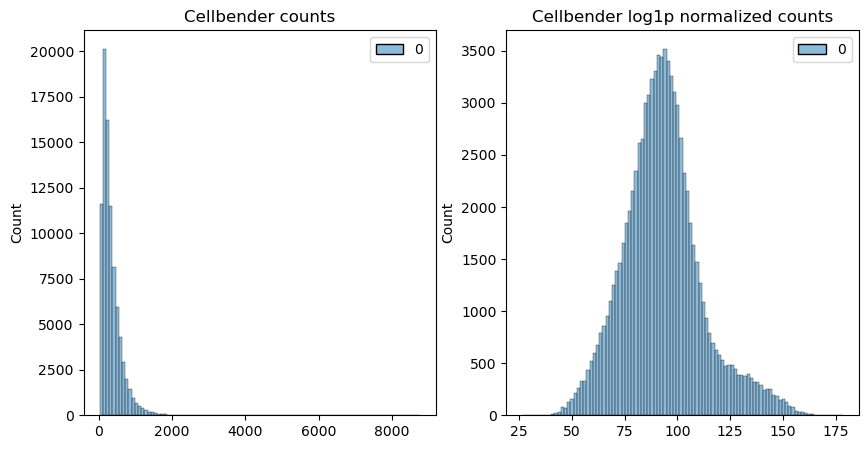

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
p1 = sns.histplot(adata.layers["cellbender"].sum(1), bins=100, kde=False, ax=axes[0])
axes[0].set_title("Cellbender counts")
p2 = sns.histplot(adata.layers["log1p_norm_cb"].sum(1), bins=100, kde=False, ax=axes[1])
axes[1].set_title("Cellbender log1p normalized counts")
# p1 = sns.histplot(adata.layers["counts"].sum(1), bins=100, kde=False, ax=axes[0])
# axes[0].set_title("Counts")
# p2 = sns.histplot(adata.layers["log1p_norm"].sum(1), bins=100, kde=False, ax=axes[1])
# axes[1].set_title("Log1p normalized counts")
plt.show()

In [16]:
# get the counts sum of genes starting with mt in different layers
mt_counts = adata.layers['counts'].toarray()[:, adata.var_names.str.startswith('mt-')]
mt_counts_cb = adata.layers['cellbender'].toarray()[:, adata.var_names.str.startswith('mt-')]
mt_counts_log1p_norm_cb = adata.layers['log1p_norm_cb'].toarray()[:, adata.var_names.str.startswith('mt-')]
print(mt_counts.sum())
print(mt_counts_cb.sum())
print(mt_counts_log1p_norm_cb.sum())

2547664.0
461414
141896.39


#### Filter non-nuclear genes

In [17]:
# For mouse data (based on your gene names):
adata.var['hb'] = adata.var_names.str.contains('^Hb[^(p)]', case=False)
adata.var['ribo'] = adata.var_names.str.contains('^Rp[sl]', case=False)
adata.var['mt'] = adata.var_names.str.contains('^mt-', case=False)

In [18]:
print("\nHemoglobin genes found:")
print(adata.var[adata.var['hb']].index.tolist())
print("Mitochondrial genes found:")
print(adata.var[adata.var['mt']].index.tolist())
print("Ribosomal genes found:")
print(adata.var[adata.var['ribo']].index.tolist())


Hemoglobin genes found:
['Hbb-bt', 'Hbb-bs', 'Hba-a1', 'Hba-a2']
Mitochondrial genes found:
['mt-Nd1', 'mt-Nd2', 'mt-Co1', 'mt-Co2', 'mt-Atp6', 'mt-Co3', 'mt-Nd4', 'mt-Nd5', 'mt-Cytb']
Ribosomal genes found:
['Rps6ka1', 'Rps6ka6']


In [19]:
# remove all genes that are encoded in mitochondrial DNA
adata = adata[:,(~adata.var['mt'] & ~adata.var['ribo']) & ~adata.var['hb']] # Filter mitochondrial, linc, ribosomal, haemoglobin genes

In [20]:
adata_male = adata[adata.obs['sex'] == 'M']
adata_female = adata[adata.obs['sex'] == 'F']

In [21]:
output_dir = '/ocean/projects/cis240075p/asachan/datasets/TA_muscle/ERCC1_KO_mice/integrated_samples/analysis'
# Set scanpy settings
sc.settings.verbosity = 1
sc.settings.figdir = output_dir

## Cell type specific analysis

In [ ]:
### DDR genes 
dna_damage_response = ['Atr', 'Atm', 'Chek1', 'Chek2', 'Trp53', 'Mdm2', 'Cdkn1a', 'Brca1', 'Brca2', 'Rad51', 'Xrcc6', 'Prkdc', 'Parp1', 'Xrcc1', 'Fancd2']

# Find available DDR genes
available_ddr_genes = [gene for gene in dna_damage_response if gene in adata.var_names]
print(f"\nFound {len(available_ddr_genes)} DNA damage response genes in dataset:")
for gene in available_ddr_genes:
    print(f"{gene}")

## Pseudobulk analysis

In [22]:
# Analyze Male Cells
print("Analyzing Male Cells...")
adata_male_filtered, male_deg_results = perform_deg_analysis(
    adata_male, 
    condition_column='condition',
    reference='WT', 
    comparison='KO',
    sex_label='Male', #used for naming the files
    output_dir=output_dir,
    layer='log1p_norm_cb'
)

# Analyze Female Cells  
print("Analyzing Female Cells...")
adata_female_filtered, female_deg_results = perform_deg_analysis(
    adata_female,
    condition_column='condition',
    reference='WT',
    comparison='KO', 
    sex_label='Female',
    output_dir=output_dir,
    layer='log1p_norm_cb'
)

Analyzing Male Cells...
=== Performing DEG Analysis: Male KO vs WT ===
Available conditions: ['KO', 'WT']
Categories (2, object): ['KO', 'WT']
Cells in analysis - WT: 18771
Cells in analysis - KO: 26017
Total genes analyzed: 1985
Significantly upregulated genes (padj < 0.05, |log2FC| > 0.5): 154
Significantly downregulated genes (padj < 0.05, |log2FC| > 0.5): 79
Analyzing Female Cells...
=== Performing DEG Analysis: Female KO vs WT ===
Available conditions: ['KO', 'WT']
Categories (2, object): ['KO', 'WT']
Cells in analysis - WT: 22016
Cells in analysis - KO: 21112
Total genes analyzed: 1985
Significantly upregulated genes (padj < 0.05, |log2FC| > 0.5): 48
Significantly downregulated genes (padj < 0.05, |log2FC| > 0.5): 160


/ocean/projects/cis240075p/asachan/.conda/envs/scproc/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


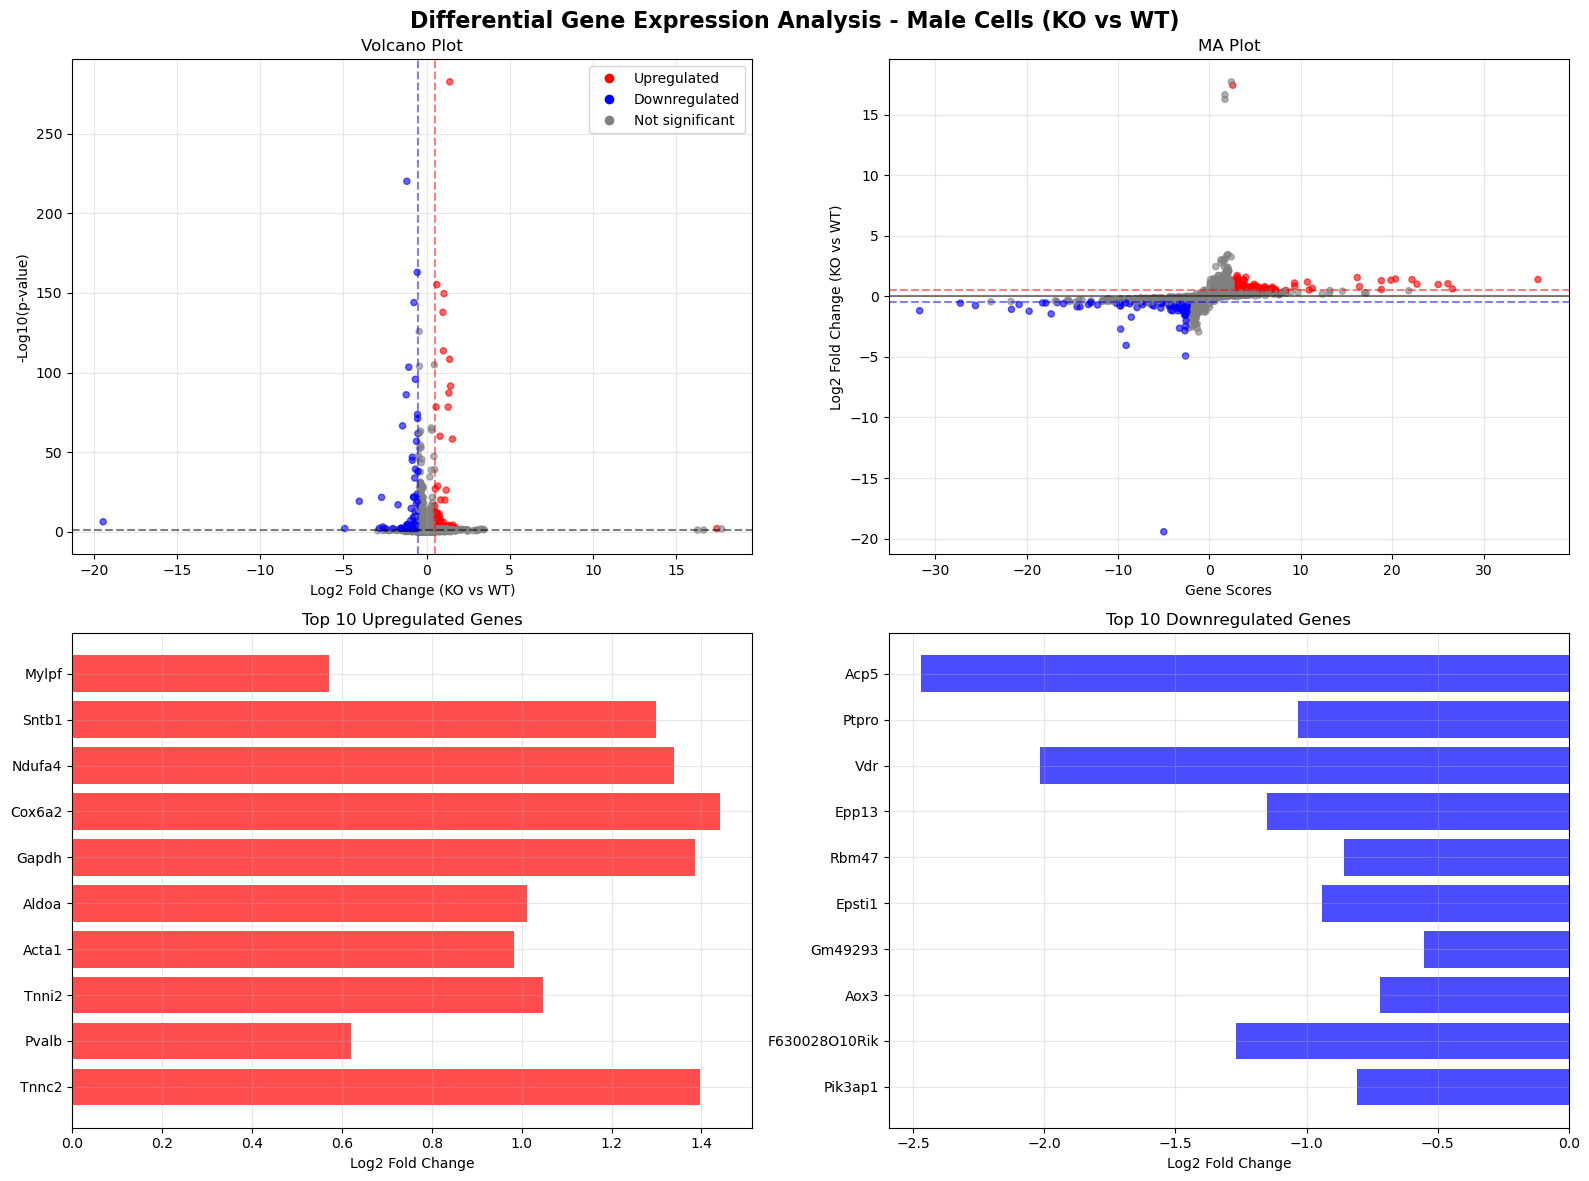

Visualization saved at: /ocean/projects/cis240075p/asachan/datasets/TA_muscle/ERCC1_KO_mice/integrated_samples/analysis/DEG_analysis_male.png


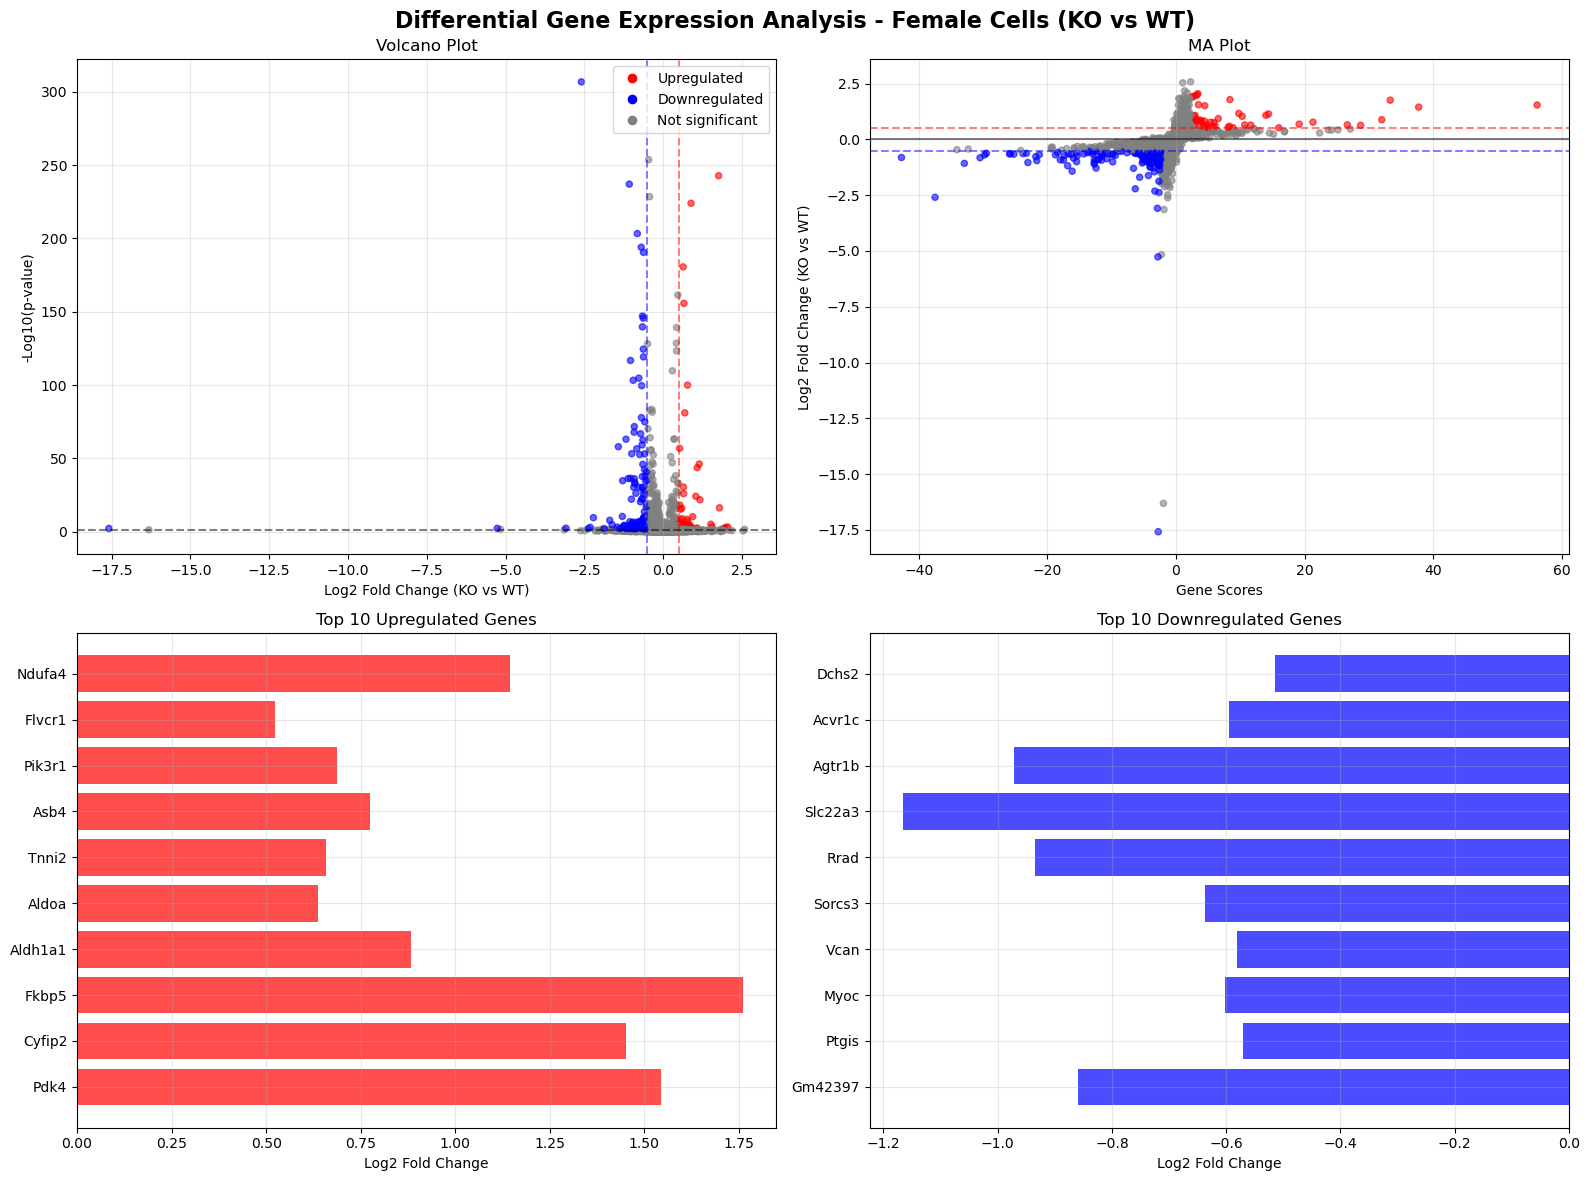

Visualization saved at: /ocean/projects/cis240075p/asachan/datasets/TA_muscle/ERCC1_KO_mice/integrated_samples/analysis/DEG_analysis_female.png


In [23]:
# Visualize and Save Results
if male_deg_results is not None:
    visualize_deg_results(male_deg_results, 'Male', output_dir)

if female_deg_results is not None:
    visualize_deg_results(female_deg_results, 'Female', output_dir)

In [ ]:
# save to csv
save_deg_results(male_deg_results, 'Male', output_dir)
save_deg_results(female_deg_results, 'Female', output_dir)


In [ ]:
if male_deg_results is not None and female_deg_results is not None:
    # Get significant genes with their regulation direction
    male_sig = male_deg_results[male_deg_results['significant']].copy()
    female_sig = female_deg_results[female_deg_results['significant']].copy()
    
    # Separate by regulation direction
    male_up = set(male_sig[male_sig['logfoldchanges'] > 0]['names'])
    male_down = set(male_sig[male_sig['logfoldchanges'] < 0]['names'])
    female_up = set(female_sig[female_sig['logfoldchanges'] > 0]['names'])
    female_down = set(female_sig[female_sig['logfoldchanges'] < 0]['names'])
    
    # Find common and sex-specific DEGs by regulation direction
    common_up = male_up.intersection(female_up)
    common_down = male_down.intersection(female_down)
    male_specific_up = male_up - female_up
    male_specific_down = male_down - female_down
    female_specific_up = female_up - male_up
    female_specific_down = female_down - male_down
    
    print(f"\n=== COMPARISON SUMMARY BY REGULATION ===")
    print(f"Common up-regulated DEGs: {len(common_up)}")
    print(f"Common down-regulated DEGs: {len(common_down)}")
    print(f"Male-specific up-regulated DEGs: {len(male_specific_up)}")
    print(f"Male-specific down-regulated DEGs: {len(male_specific_down)}")
    print(f"Female-specific up-regulated DEGs: {len(female_specific_up)}")
    print(f"Female-specific down-regulated DEGs: {len(female_specific_down)}")
    
    # Create DataFrame with gene names as rows
    # Find the maximum length to determine DataFrame size
    max_length = max(len(common_up), len(common_down), 
                    len(male_specific_up), len(male_specific_down),
                    len(female_specific_up), len(female_specific_down))
    
    # Create DataFrame with NaN padding
    comparison_df = pd.DataFrame({
        'common_up': list(common_up) + [np.nan] * (max_length - len(common_up)),
        'common_down': list(common_down) + [np.nan] * (max_length - len(common_down)),
        'male_specific_up': list(male_specific_up) + [np.nan] * (max_length - len(male_specific_up)),
        'male_specific_down': list(male_specific_down) + [np.nan] * (max_length - len(male_specific_down)),
        'female_specific_up': list(female_specific_up) + [np.nan] * (max_length - len(female_specific_up)),
        'female_specific_down': list(female_specific_down) + [np.nan] * (max_length - len(female_specific_down))
    })
    
    # Save the detailed comparison results
    comparison_file = 'DEG_sex_comparison_detailed.csv'
    comparison_df.to_csv(os.path.join(output_dir, comparison_file), index=False)
    print(f"Detailed sex comparison results saved at: {comparison_file}")
    
    # Also create a summary DataFrame
    summary_df = pd.DataFrame({
        'Category': ['Common up-regulated', 'Common down-regulated', 
                    'Male-specific up-regulated', 'Male-specific down-regulated',
                    'Female-specific up-regulated', 'Female-specific down-regulated'],
        'Count': [len(common_up), len(common_down), 
                 len(male_specific_up), len(male_specific_down),
                 len(female_specific_up), len(female_specific_down)]
    })

In [ ]:
# get a ranked genelist for pathway analysis
male_ranked_degs = create_ranked_genelist(male_deg_results, log2fc_col='logfoldchanges', pval_col='pvals_adj', gene_col='names', min_pval=1e-300)
female_ranked_degs = create_ranked_genelist(female_deg_results, log2fc_col='logfoldchanges', pval_col='pvals_adj', gene_col='names', min_pval=1e-300)
print(male_ranked_degs)


## Load pre-calculated DEGs

In [ ]:
# ########## file paths ##########
# output_dir = "/ocean/projects/cis240075p/asachan/datasets/TA_muscle/seurat_outs/pathways"
# #fast2b
# female_fast2b_path = os.path.join(working_dir, "Female_FastIIB_unfiltered_KO_DEGs.csv")
# male_fast2b_path = os.path.join(working_dir, "Male_Fast IIB_unfiltered_KO_DEGs_nmt.csv")
# #fast2x
# female_fast2x_path = os.path.join(working_dir, "Female_FastIIX_unfiltered_KO_DEGs.csv")
# male_fast2x_path = os.path.join(working_dir, "Male_Fast IIX_unfiltered_KO_DEGs_nmt.csv")
# # #faps
# # female_faps_path = os.path.join(working_dir, "Female_FAPs_unfiltered_KO_DEGs_nmt.csv")
# # male_faps_path = os.path.join(working_dir, "Male_FAPs_unfiltered_KO_DEGs_nmt.csv")
# # #musc
# # female_musc_path = os.path.join(working_dir, "Female_Skeleton MuSc_unfiltered_KO_DEGs_nmt.csv")
# # male_musc_path = os.path.join(working_dir, "Male_Skeleton MuSc_unfiltered_KO_DEGs_nmt.csv")


In [ ]:
# ############ load cell-type specific DEGs ############

# path_female_degs = female_fast2b_path
# path_male_degs = male_fast2b_path
# female_degs = pd.read_csv(path_female_degs, header=0)
# female_degs.rename(columns={female_degs.columns[0]: 'gene_name'}, inplace=True)
# male_degs = pd.read_csv(path_male_degs, header=0)
# male_degs.rename(columns={male_degs.columns[0]: 'gene_name'}, inplace=True)

In [ ]:
# gsea_female_degs = create_ranked_genelist(female_degs)
# gsea_male_degs = create_ranked_genelist(male_degs)

## Load the genesets of interest (mouse)

In [ ]:
# load msigDB all genesets for mice
msigdb_mice_gmt = "/ocean/projects/cis240075p/asachan/datasets/gene_sets/mouse/msigdb.v2024.1.Mm.symbols.gmt"
mhallmark_gmt = "/ocean/projects/cis240075p/asachan/datasets/gene_sets/mouse/mh.all.v2024.1.Mm.symbols.gmt"

In [ ]:
msigdb_mice = gmt_to_decoupler(msigdb_mice_gmt)
mhallmark = gmt_to_decoupler(mhallmark_gmt)
# Count unique genesets
n_unique_genesets = msigdb_mice['geneset'].nunique()
n_unique_genesets_mhallmark = mhallmark['geneset'].nunique()
print(f"Number of unique genesets: {n_unique_genesets}")
print(f"Number of unique genesets: {n_unique_genesets_mhallmark}")

In [ ]:
# Filtering genesets to match behaviour of fgsea
geneset_size = msigdb_mice.groupby("geneset").size()
geneset_size_mhallmark = mhallmark.groupby("geneset").size()
# Index object of genesets that have more than 15 and less than 500 genes
gsea_genesets = geneset_size.index[(geneset_size > 15) & (geneset_size < 500)]
gsea_genesets_mhallmark = geneset_size_mhallmark.index[(geneset_size_mhallmark > 15) & (geneset_size_mhallmark < 500)]

### Select Pathways related to mitochondrial function

In [ ]:
# Create a list of keywords you're interested in
keywords = [
    'OXIDATIVE_PHOSPHORYLATION',      # For oxidative phosphorylation
    'TCA',         # For TCA cycle
    'GLUTAMINE',   # For glutamine metabolism
    'CALCIUM',     # For calcium signaling
    'APOPTOSIS'    # For apoptosis
]

selected_pathways = [
    pathway for pathway in gsea_genesets
    if any(keyword.lower() in pathway.lower() for keyword in keywords)
]

display(len(selected_pathways))

In [ ]:
# find the geneset that contains the gene 'Atp2a1'
serca_genesets = []
for geneset in selected_pathways:
    if 'Atp2a1' in msigdb_mice[msigdb_mice['geneset'] == geneset]['genesymbol'].values:
        serca_genesets.append(geneset)
        break

display(serca_genesets)

#### Run gsea

In [ ]:
scores, norm, pvals = dc.run_gsea(
    male_ranked_degs,
    mhallmark,
    source="geneset",
    target="genesymbol",
)

gsea_results = (
    pd.concat({"score": scores.T, "norm": norm.T, "pval": pvals.T}, axis=1)
    .droplevel(level=1, axis=1)
    .sort_values("pval")
)
display(gsea_results.head())

In [ ]:
# First prepare your data
# gsea_results = gsea_results[~gsea_results.index.str.startswith('WP')]
gsea_results['-log10(pval)'] = -np.log10(gsea_results['pval'].replace(0, 1e-300))
gsea_results['Group'] = gsea_results['score'].apply(lambda x: 'Up' if x > 0 else 'Down')
# Create a copy with reset index to get the pathway names as a column
plot_df = gsea_results.reset_index().copy()
plot_df[['Gene_set', 'Name']] = plot_df['source'].str.extract(r'(GOBP|REACTOME|KEGG|HALLMARK|GOMF|GOCC|GRAESSMANN|WP)_(.+)')
plot_df['Name'] = plot_df['Name'].apply(lambda x: '_'.join(x.split('_')[:6]))
plot_df = plot_df.loc[plot_df.groupby('Name')['-log10(pval)'].idxmax()]
# copy source column to a new column called 'Term'
plot_df['Term'] = plot_df['source']
display(plot_df.head())


## Plotting the enrichment results

In [ ]:
from gseapy.scipalette import SciPalette
sci = SciPalette()
NbDr = sci.create_colormap()

In [ ]:
# Create simplified terms and group by them
plot_df['simple_term'] = plot_df['Term'].apply(simplify_term)
# Keep only the most significant pathway for each simplified term
plot_df = plot_df.loc[plot_df.groupby('simple_term')['-log10(pval)'].idxmax()]
# Sort to put Up group at top
plot_df = plot_df.sort_values(['Group', '-log10(pval)'], ascending=[True, False])

ax = gp.barplot(
    df=plot_df,
    column='-log10(pval)',
    group='Group',
    title='Male pathways for ranked list of up & down DEGs',
    color={'Up': 'red', 'Down': 'blue'},
    cutoff=2.0,
    figsize=(14, 8)
)

# Set x-axis limits and ticks
ax.set_xlim(0, 2)  # Fixed limit to 2.5
ax.set_xticks([0, 1, 2])  # Only show 0, 1, and 2
ax.grid(axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.subplots_adjust(left=0.4)
plt.show()

In [ ]:
cutoff_for_plotting_data = plot_df[plot_df['-log10(pval)'] <= 2][['Term', 'Group', '-log10(pval)']]
top_paths = (cutoff_for_plotting_data.groupby('Group')
            .apply(lambda x: x.nlargest(min(10, len(x)), '-log10(pval)'))
            .reset_index(drop=True))

# Sort by Group (to keep Up on top) and then by -log10(pval)
top_paths = top_paths.sort_values(['Group', '-log10(pval)'], ascending=[True, False])
display(top_paths)
